In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('mall customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [6]:
df.drop('CustomerID', axis='columns', inplace=True)

In [7]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [8]:
df.rename(columns={'Spending Score (1-100)' : 'score' , 'Annual Income (k$)':'income'}, inplace=True)

In [9]:
df

,Gender,Age,income,score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [15]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le=LabelEncoder()
df.Gender=le.fit_transform(df.Gender)

In [18]:
df.head()

,Gender,Age,income,score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


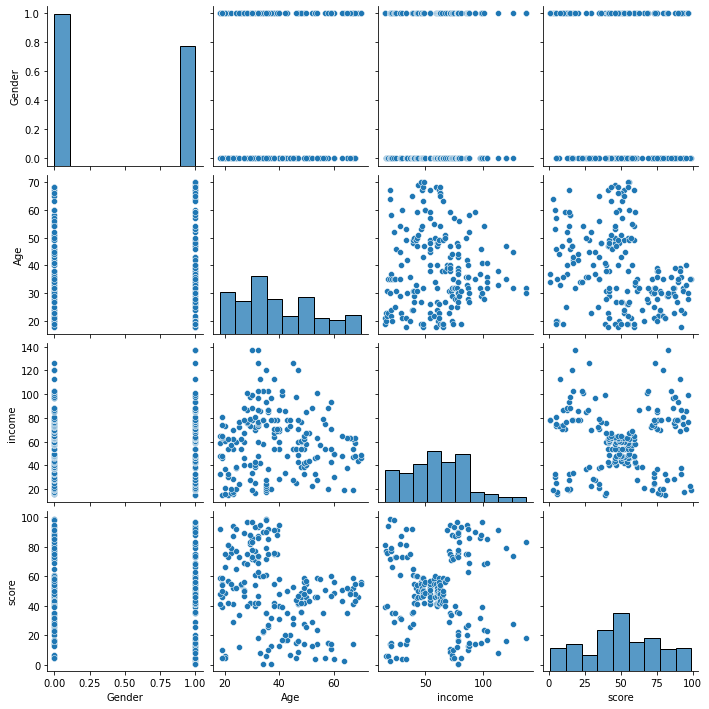

In [19]:
#pairplot
sns.pairplot(df[['Gender','Age','income','score']])

In [20]:
import sklearn.cluster as cluster

In [21]:
kmeans = cluster.KMeans()

In [22]:
kmeans.fit(df[['Gender','Age','income', 'score']])

KMeans()

In [23]:
kmeans.cluster_centers_

array([[  0.65384615,  41.23076923,  79.26923077,  15.92307692],
       [  0.43181818,  56.34090909,  53.70454545,  49.38636364],
       [  0.40909091,  25.27272727,  25.72727273,  79.36363636],
       [  0.48275862,  32.86206897,  78.55172414,  82.17241379],
       [  0.40909091,  44.31818182,  25.77272727,  20.27272727],
       [  0.3       ,  41.        , 109.7       ,  22.        ],
       [  0.4       ,  32.2       , 109.7       ,  82.        ],
       [  0.35135135,  27.10810811,  56.2972973 ,  49.67567568]])

In [24]:
df['clusters'] = kmeans.predict(df[['Gender','Age','income', 'score']])

In [25]:
df

,Gender,Age,income,score,clusters
0,1,19,15,39,4
1,1,21,15,81,2
2,0,20,16,6,4
3,0,23,16,77,2
4,0,31,17,40,4
...,...,...,...,...,...
195,0,35,120,79,6
196,0,45,126,28,5
197,1,32,126,74,6
198,1,32,137,18,5


In [26]:
df1=df.copy()

In [27]:
df1

,Gender,Age,income,score,clusters
0,1,19,15,39,4
1,1,21,15,81,2
2,0,20,16,6,4
3,0,23,16,77,2
4,0,31,17,40,4
...,...,...,...,...,...
195,0,35,120,79,6
196,0,45,126,28,5
197,1,32,126,74,6
198,1,32,137,18,5


In [28]:
df0 = df[df.clusters == 0]
df1 = df[df.clusters == 1]
df2 = df[df.clusters == 2]
df3 = df[df.clusters == 3]
df4 = df[df.clusters == 4]
df5 = df[df.clusters == 5]
df6 = df[df.clusters == 6]
df7 = df[df.clusters == 7]

In [29]:
df.shape

(200, 5)

In [30]:
df0.shape

(26, 5)

In [31]:
df6.shape

(10, 5)

In [32]:
centers1 = kmeans.cluster_centers_

In [33]:
centers1

array([[  0.65384615,  41.23076923,  79.26923077,  15.92307692],
       [  0.43181818,  56.34090909,  53.70454545,  49.38636364],
       [  0.40909091,  25.27272727,  25.72727273,  79.36363636],
       [  0.48275862,  32.86206897,  78.55172414,  82.17241379],
       [  0.40909091,  44.31818182,  25.77272727,  20.27272727],
       [  0.3       ,  41.        , 109.7       ,  22.        ],
       [  0.4       ,  32.2       , 109.7       ,  82.        ],
       [  0.35135135,  27.10810811,  56.2972973 ,  49.67567568]])

# Select Optimal Number of Cluster

In [36]:
from sklearn.cluster import KMeans
wcss = []
cluster = range(1,15)
for k in cluster:
    kmeans2 = KMeans(n_clusters=k) # default = 8
    kmeans2.fit(df[['Gender','Age','income', 'score']])
    wcss.append(kmeans2.inertia_) 

C:\Users\Itu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [37]:
wcss

[308862.06000000006,
 212889.44245524294,
 143391.59236035674,
 104414.67534220174,
 75412.59682443162,
 58348.64136331505,
 51132.70321257687,
 44684.92754188377,
 40904.21522194914,
 37803.057002379755,
 34987.815877430345,
 32131.800548715964,
 29700.575153087637,
 28148.588771260842]

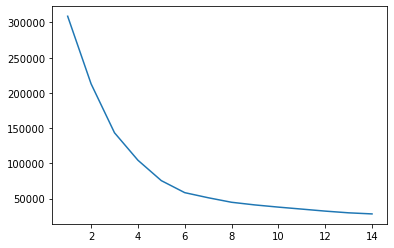

In [38]:
plt.plot(cluster, wcss,)

In [39]:
!pip install kneed

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\Itu\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\Itu\anaconda3\lib\site-packages\pip\_vendor\urllib3\response.py", line 519, in read
    data = self._fp.read(amt) if not fp_closed else b""
  File "C:\Users\Itu\anaconda3\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 62, in read
    data = self.__fp.read(amt)
  File "C:\Users\Itu\anaconda3\lib\http\client.py", line 462, in read
    n = self.readinto(b)
  File "C:\Users\Itu\anaconda3\lib\http\client.py", line 506, in readinto
    n = self.fp.readinto(b)
  File "C:\Users\Itu\anaconda3\lib\socket.py", line 704, in readinto
    return self._sock.recv_into(b)
  File "C:\Users\Itu\anaconda3\lib\ssl.py", line 1241, in recv_into
    return self.read(nbytes, buffer)
  File "C:\Users\Itu\anaconda3\lib\ssl.py", line 1099, in read
    return self._sslobj.read(len, buffer)
socket.timeout: The

In [40]:
from kneed import KneeLocator

In [41]:
kn = KneeLocator(cluster, wcss, curve='convex', direction = 'decreasing')

In [42]:
print('Optimal number of clusters =', kn.knee)

Optimal number of clusters = 5


In [43]:
df.head()

,Gender,Age,income,score,clusters
0,1,19,15,39,4
1,1,21,15,81,2
2,0,20,16,6,4
3,0,23,16,77,2
4,0,31,17,40,4


In [44]:
import sklearn.cluster as cls

In [45]:
kmean3 = cls.KMeans(n_clusters=5)

In [46]:
df['new_cluster'] = kmean3.fit_predict(df[['Gender','Age','income', 'score']])

In [47]:
df.head()

,Gender,Age,income,score,clusters,new_cluster
0,1,19,15,39,4,3
1,1,21,15,81,2,2
2,0,20,16,6,4,3
3,0,23,16,77,2,2
4,0,31,17,40,4,3


In [48]:
centers2 = kmean3.cluster_centers_

In [49]:
centers2

array([[ 0.41772152, 43.08860759, 55.29113924, 49.56962025],
       [ 0.46153846, 32.69230769, 86.53846154, 82.12820513],
       [ 0.39130435, 25.52173913, 26.30434783, 78.56521739],
       [ 0.39130435, 45.2173913 , 26.30434783, 20.91304348],
       [ 0.52777778, 40.66666667, 87.75      , 17.58333333]])

ValueError: Supply a 'c' argument or a 'color' kwarg but not both; they differ but their functionalities overlap.

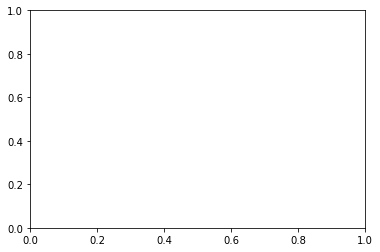

In [50]:
df0 = df[df.new_cluster == 0]
df1 = df[df.new_cluster == 1]
df2 = df[df.new_cluster == 2]
df3 = df[df.new_cluster == 3]
df4 = df[df.new_cluster == 4]

plt.scatter(df0['Gender'],df0['Age'],df0['income'], df0['score'], color='green', label='cl0')
plt.scatter(df1['Gender'],df1['Age'],df1['income'], df1['score'], color='red', label='cl1')
plt.scatter(df2['Gender'],df2['Age'],df2['income'], df2['score'], color='cyan', label='cl2')
plt.scatter(df3['Gender'],df3['Age'],df3['income'], df3['score'], color='yellow', label='cl3')
plt.scatter(df4['Gender'],df4['Age'],df4['income'], df4['score'], color='orange', label='cl4')

plt.scatter(centers2[:,0] , centers2[:,1], color='black',label='centroids')

plt.legend()